In [75]:
# Author:   Kelan Morgan
# Purpose:  Machine Learning Portfolio

# Data:
# - UN WPP (2022); HMD (2023); Zijdeman et al. (2015); Riley (2005) – with minor processing by Our World in Data. “Life expectancy at birth – 
# Various sources – period tables” [dataset]. Human Mortality Database, “Human Mortality Database”; United Nations, 
# “World Population Prospects 2022”; United Nations, “World Population Prospects”; Zijdeman et al., “Life Expectancy at birth 2”; James C. Riley, 
# “Estimates of Regional and Global Life Expectancy, 1800-2001” [original data]. Retrieved October 22, 2024 from https://ourworldindata.org/grapher/life-expectancy

In [76]:
# Imports
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [77]:
# Load CSV
data = pandas.read_csv("Data/life-expectancy.csv", sep = ",", header = 0)

print(data.values)

[['Afghanistan' 'AFG' 1950 27.7275]
 ['Afghanistan' 'AFG' 1951 27.9634]
 ['Afghanistan' 'AFG' 1952 28.4456]
 ...
 ['Zimbabwe' 'ZWE' 2019 61.2925]
 ['Zimbabwe' 'ZWE' 2020 61.1242]
 ['Zimbabwe' 'ZWE' 2021 59.2531]]


In [79]:
# Data Pre-Processing

# Re-name life expectancy column
data.rename(columns={"Period life expectancy at birth - Sex: all - Age: 0": "Life Expectancy"}, inplace=True)
data = data[data['Year'] > 1800]

# remove rows with Uknown in price column from table and price is no larger than 5 million
# data = data[data['Price'] != 'Uknown']
# data['Price'] = pandas.to_numeric(data['Price'], errors='coerce')
# data = data[pandas.to_numeric(data['Price']) <= 5000000]

# # remove cars with 1 mile in data and change null to 0
# data = data[data['Runned_Miles'] != '1 mile']
# data = data.dropna(subset=['Runned_Miles'])
# data['Runned_Miles'] = pandas.to_numeric(data['Runned_Miles'], errors='coerce')
# data = data[data['Runned_Miles'] < 400000]

print(data['Year'])
print(data['Life Expectancy'])

0        1950
1        1951
2        1952
3        1953
4        1954
         ... 
20750    2017
20751    2018
20752    2019
20753    2020
20754    2021
Name: Year, Length: 20755, dtype: int64
0        27.7275
1        27.9634
2        28.4456
3        28.9304
4        29.2258
          ...   
20750    60.7095
20751    61.4141
20752    61.2925
20753    61.1242
20754    59.2531
Name: Life Expectancy, Length: 20755, dtype: float64


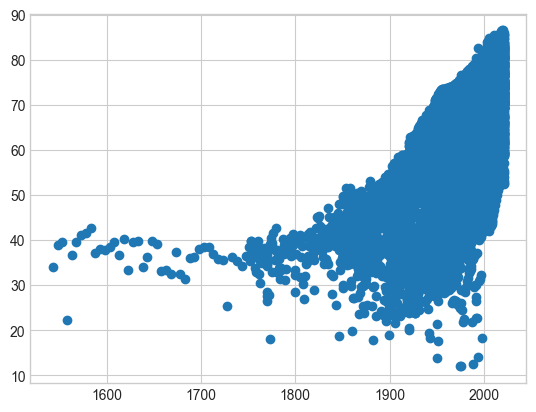

In [80]:
x = data['Year']
y = data['Life Expectancy']

plt.scatter(x, y)


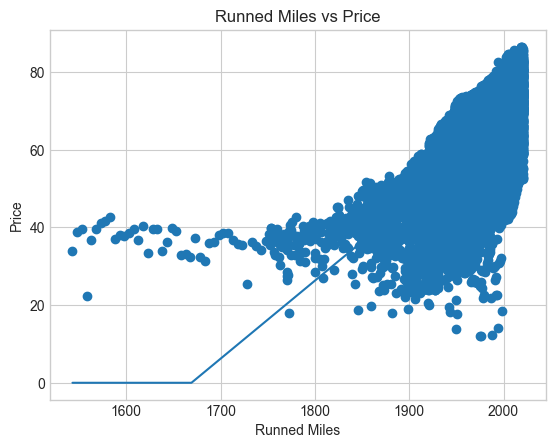

[1543.         1543.47847848 1543.95695696 1544.43543544 1544.91391391
 1545.39239239 1545.87087087 1546.34934935 1546.82782783 1547.30630631
 1547.78478478 1548.26326326 1548.74174174 1549.22022022 1549.6986987
 1550.17717718 1550.65565566 1551.13413413 1551.61261261 1552.09109109
 1552.56956957 1553.04804805 1553.52652653 1554.00500501 1554.48348348
 1554.96196196 1555.44044044 1555.91891892 1556.3973974  1556.87587588
 1557.35435435 1557.83283283 1558.31131131 1558.78978979 1559.26826827
 1559.74674675 1560.22522523 1560.7037037  1561.18218218 1561.66066066
 1562.13913914 1562.61761762 1563.0960961  1563.57457457 1564.05305305
 1564.53153153 1565.01001001 1565.48848849 1565.96696697 1566.44544545
 1566.92392392 1567.4024024  1567.88088088 1568.35935936 1568.83783784
 1569.31631632 1569.79479479 1570.27327327 1570.75175175 1571.23023023
 1571.70870871 1572.18718719 1572.66566567 1573.14414414 1573.62262262
 1574.1011011  1574.57957958 1575.05805806 1575.53653654 1576.01501502
 1576.4

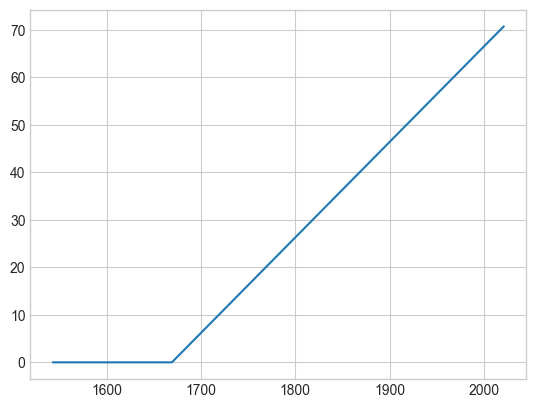

In [83]:
model = LinearRegression(fit_intercept=True)

model.fit(x.to_numpy()[:, np.newaxis], y)

xfit = np.linspace(min(data['Year']), max(data['Year']), 1000)
yfit = np.clip(model.predict(xfit[:, np.newaxis]), 0, None)

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlabel('Runned Miles')
plt.ylabel('Price')
plt.title('Runned Miles vs Price')
plt.show()
plt.plot(xfit, yfit)